<a href="https://colab.research.google.com/github/JacquelineeJia/datathon1/blob/main/Analyzing%20Public%20Health%20Factors%20and%20BMI%20Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

#### Upload Dataset 1

In [2]:
df1 = pd.read_csv('/content/Dataset1.csv')

# New Section

In [3]:
df1.head(10)

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685
5,25,Male,1939,23,71,4,11,1.692665,65.076352,22.713344
6,78,Male,3156,21,119,0,2,1.689306,57.114269,20.013738
7,38,Male,2213,90,112,0,11,1.854340,72.639988,21.125011
8,56,Male,1931,87,93,2,10,1.800220,55.153468,17.018513
9,75,Female,2447,60,0,2,0,1.657941,65.319929,23.763338


In [4]:
#Check all columns naming
df1.columns

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')

In [5]:
# create a dataframe using pandas
df11 = pd.DataFrame(df1)
df11.dtypes

Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
dtype: object

In [6]:
#check if there exist missing value
df11.isnull().sum()
df11.describe()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


In [7]:
df11["Healthiness"] = None

In [8]:
# create a new flag column based on BMI range, indicating to the healthiness level
df11.loc[(df11['BMI'] < 18.5), 'Healthiness'] = 'underweight'
df11.loc[(df11['BMI'] >= 18.5) &(df11['BMI'] < 25) , 'Healthiness'] = 'healthy'
df11.loc[(df11['BMI'] < 30)& (df11['BMI'] >= 25), 'Healthiness'] = 'overweight'
df11.loc[(df11['BMI'] >= 30), 'Healthiness'] = 'obese'
print(df11)

'''
example of adding a conditional column
df.loc[(df['column1'] > 2) & (df['column2'] < 40), 'new_column'] = 'Condition Met'
df.loc[(df['column1'] <= 2) | (df['column2'] >= 40), 'new_column'] = 'Condition Not Met'
'''

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56  Female            3091            90                160   
1       69  Female            2090           106                 27   
2       46    Male            2938            11                 45   
3       32  Female            3022            48                112   
4       60  Female            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51  Female            2858            65                 37   
23531   20  Female            2573            27                 27   
23532   26  Female            2246            37                 44   
23533   22    Male            1588            24                101   
23534   59    Male            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                        4            1  1.569070  81.199394  32.981343 

"\nexample of adding a conditional column\ndf.loc[(df['column1'] > 2) & (df['column2'] < 40), 'new_column'] = 'Condition Met'\ndf.loc[(df['column1'] <= 2) | (df['column2'] >= 40), 'new_column'] = 'Condition Not Met'\n"

<ipython-input-9-f315bcdc81e0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df11.corr()


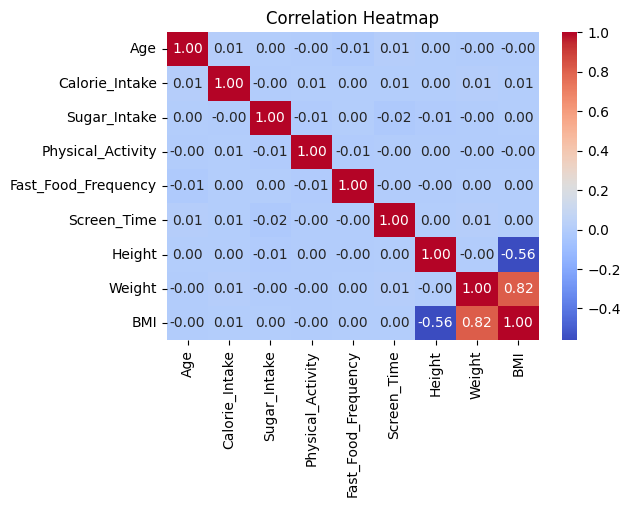

In [9]:
# visualization of important factors

import matplotlib.pyplot as plt
import seaborn as sns

# correlation heatmap

correlation_matrix = df11.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

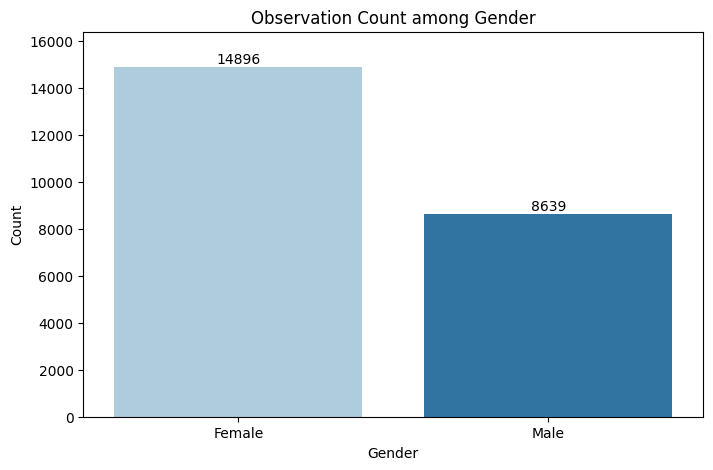

In [10]:

# counts of observations in each healthiness group
sns.set_palette("Paired")

# create a new dataframe to store counts of observations in each group
gender_counts = df11.groupby('Gender').size().reset_index(name='Count')

# plot data
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=gender_counts['Gender'],
            y=gender_counts['Count'],
            ax=ax).set(title='Observation Count among Gender')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

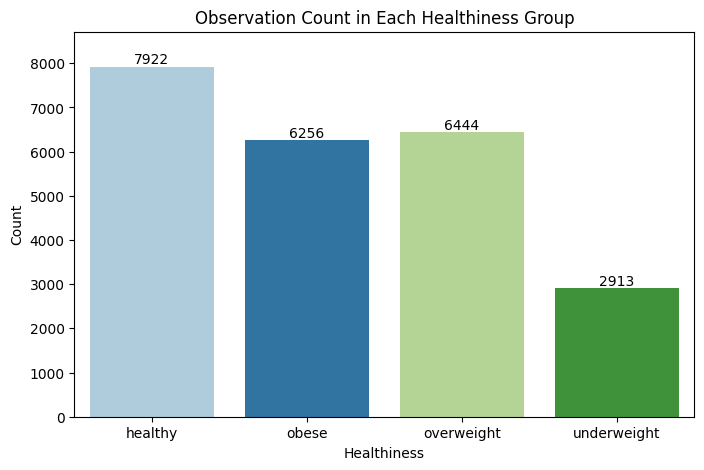

In [11]:
# counts of observations in each healthiness group
sns.set_palette("Paired")

# create a new dataframe to store counts of observations in each group
group_counts = df11.groupby('Healthiness').size().reset_index(name='Count')

# plot data
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=group_counts['Healthiness'],
            y=group_counts['Count'],
            ax=ax).set(title='Observation Count in Each Healthiness Group')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)


In [12]:
# box plot
import plotly.express as px
import plotly.io as pio
# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df11, x='Healthiness', y='Age', title='Box Plot of Age Grouped by Healthiness', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show()

In [13]:
# label encoding to Gender feature
# Using the map() function to transform the 'Gender' column
df11['Gender'] = df11['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to see the transformation
print(df11.head())

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56       1            3091            90                160   
1   69       1            2090           106                 27   
2   46       0            2938            11                 45   
3   32       1            3022            48                112   
4   60       1            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                    4            1  1.569070  81.199394  32.981343   
1                    0            9  1.629449  74.273566  27.973877   
2                    2            3  1.637726  71.453466  26.640417   
3                    1            8  1.514198  98.163045  42.813720   
4                    0            7  1.410559  57.323914  28.810685   

  Healthiness  
0       obese  
1  overweight  
2  overweight  
3       obese  
4  overweight  


In [14]:
df11.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Healthiness
0,56,1,3091,90,160,4,1,1.569070,81.199394,32.981343,obese
1,69,1,2090,106,27,0,9,1.629449,74.273566,27.973877,overweight
2,46,0,2938,11,45,2,3,1.637726,71.453466,26.640417,overweight
3,32,1,3022,48,112,1,8,1.514198,98.163045,42.813720,obese
4,60,1,2350,83,115,0,7,1.410559,57.323914,28.810685,overweight


In [15]:
# implementation of KNN
'''
we are trying to predict Healthiness, so we set Healthiness as label,
  and Age, Gender, Calorie_Intake, Sugar_Intake, physical_Activity,
  Fast_Food_Frequency, Height, Weight would be features to predict Healthiness.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Split data into features and label
X = df11[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity','Fast_Food_Frequency','Height','Weight']]
y = df11['Healthiness']

# Split data into training and testing sets in proportion of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
k = 18  # Setting value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8282350084972081
[[2572    0  167    4]
 [   0 1883  308    0]
 [ 309  129 1840    0]
 [ 498    0    0  528]]
              precision    recall  f1-score   support

     healthy       0.76      0.94      0.84      2743
       obese       0.94      0.86      0.90      2191
  overweight       0.79      0.81      0.80      2278
 underweight       0.99      0.51      0.68      1026

    accuracy                           0.83      8238
   macro avg       0.87      0.78      0.80      8238
weighted avg       0.85      0.83      0.82      8238



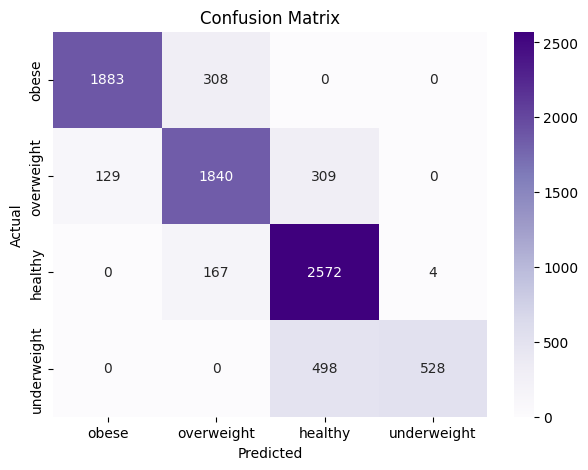

In [16]:
# Visualization of KNN Results Using a Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df11['Healthiness'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()